Data cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('airquality.csv')
data.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,24-11-2017,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,25-11-2017,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,26-11-2017,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,27-11-2017,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,28-11-2017,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [3]:
print(data.columns)

Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [4]:
data.isnull().sum()

,0
StationId,0
Date,0
PM2.5,21625
PM10,42706
NO,17106
NO2,16547
NOx,15500
NH3,48105
CO,12998
SO2,25204


In [5]:
numerical_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].mean())

In [6]:
categorical_cols = ['AQI_Bucket']
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [7]:
data.isnull().sum()

,0
StationId,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [8]:
data.duplicated().sum()

np.int64(0)

DATA INTEGRATION

In [9]:
subset_1 = data[['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2']]
subset_2 = data[['Date','NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']]

In [10]:
merged_data = pd.merge(subset_1, subset_2, on='Date')
merged_data.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,AP001,24-11-2017,71.36,115.75,1.75,20.65,12.190000,0.10,10.760000,109.26,0.170000,5.920000,179.74929
1,AP001,24-11-2017,71.36,115.75,1.75,20.65,8.590000,0.93,9.690000,110.54,4.310000,8.700000,161.00000
2,AP001,24-11-2017,71.36,115.75,1.75,20.65,28.732875,2.48,18.990000,85.10,0.720000,4.340000,406.00000
3,AP001,24-11-2017,71.36,115.75,1.75,20.65,81.040000,3.53,14.450000,33.24,11.920000,25.730000,424.00000
4,AP001,24-11-2017,71.36,115.75,1.75,20.65,28.732875,1.04,12.257634,48.02,3.358029,15.345394,286.00000


Data Transformation

In [11]:
data.dtypes

,0
StationId,object
Date,object
PM2.5,float64
PM10,float64
NO,float64
NO2,float64
NOx,float64
NH3,float64
CO,float64
SO2,float64


In [12]:
data['Date'] = pd.to_datetime(data['Date'])
data['AQI_Bucket'] = data['AQI_Bucket'].astype('category')

<ipython-input-12-90fb99e810e2>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [13]:
data.dtypes

,0
StationId,object
Date,datetime64[ns]
PM2.5,float64
PM10,float64
NO,float64
NO2,float64
NOx,float64
NH3,float64
CO,float64
SO2,float64


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['AQI_Bucket_Label'] = le.fit_transform(data['AQI_Bucket'])

In [15]:
data.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,AQI_Bucket_Label
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,179.74929,Moderate,1
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.00000,Moderate,1
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.00000,Moderate,1
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.00000,Moderate,1
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.00000,Moderate,1


In [16]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [17]:
data.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,AQI_Bucket_Label
0,AP001,2017-11-24,-0.130225,-0.439900,-0.675463,-0.537278,-0.689176,-0.892101,-0.36741,-0.131723,2.080561,-0.339416,-0.400892,-0.779758,-2.411391e-16,Moderate,1
1,AP001,2017-11-25,0.016473,-0.348728,-0.685260,-0.542802,-0.696835,-0.971373,-0.36253,0.262311,2.602126,-0.336222,-0.376223,-0.793182,3.606442e-02,Moderate,1
2,AP001,2017-11-26,-0.028530,-0.301215,-0.690948,-0.340274,-0.630539,-0.995100,-0.35765,1.293132,2.319843,-0.334093,-0.314550,-0.786470,1.463607e-01,Moderate,1
3,AP001,2017-11-27,0.124013,-0.235988,-0.522189,-0.161682,-0.464916,-0.853273,-0.36497,1.876267,2.155153,-0.326640,-0.328160,-0.773046,1.548450e-01,Moderate,1
4,AP001,2017-11-28,-0.235135,-0.561392,-0.649865,-0.264050,-0.578841,-0.933624,-0.36985,0.593018,2.926531,-0.339416,-0.439172,-0.789826,7.000173e-02,Moderate,1


 Error correcting

In [18]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
              'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

for col in pollutants:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
    print(f"{col} has {outliers} outliers.")

PM2.5 has 11169 outliers.
PM10 has 13818 outliers.
NO has 11313 outliers.
NO2 has 6657 outliers.
NOx has 10213 outliers.
NH3 has 25500 outliers.
CO has 5431 outliers.
SO2 has 9838 outliers.
O3 has 7527 outliers.
Benzene has 7273 outliers.
Toluene has 8590 outliers.
Xylene has 22898 outliers.
AQI has 6285 outliers.


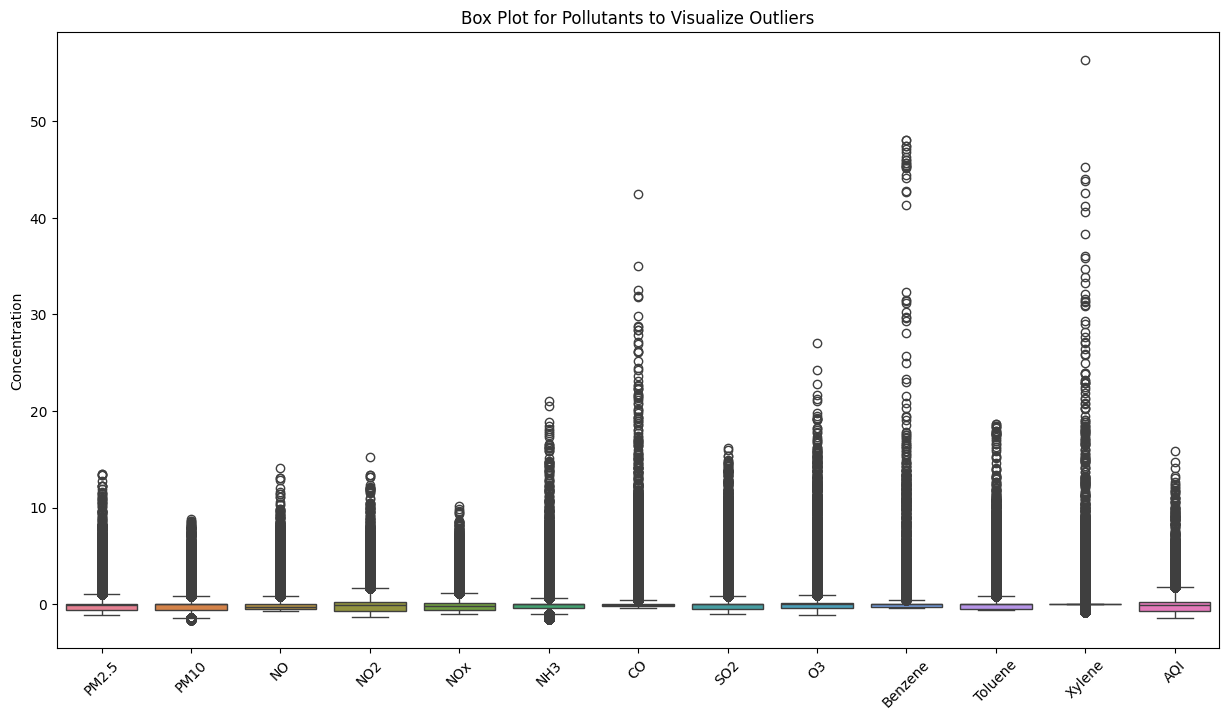

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
              'Benzene', 'Toluene', 'Xylene', 'AQI']
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[pollutants])
plt.title('Box Plot for Pollutants to Visualize Outliers')
plt.xticks(rotation=45)
plt.ylabel('Concentration')
plt.show()


In [20]:
for col in pollutants:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)


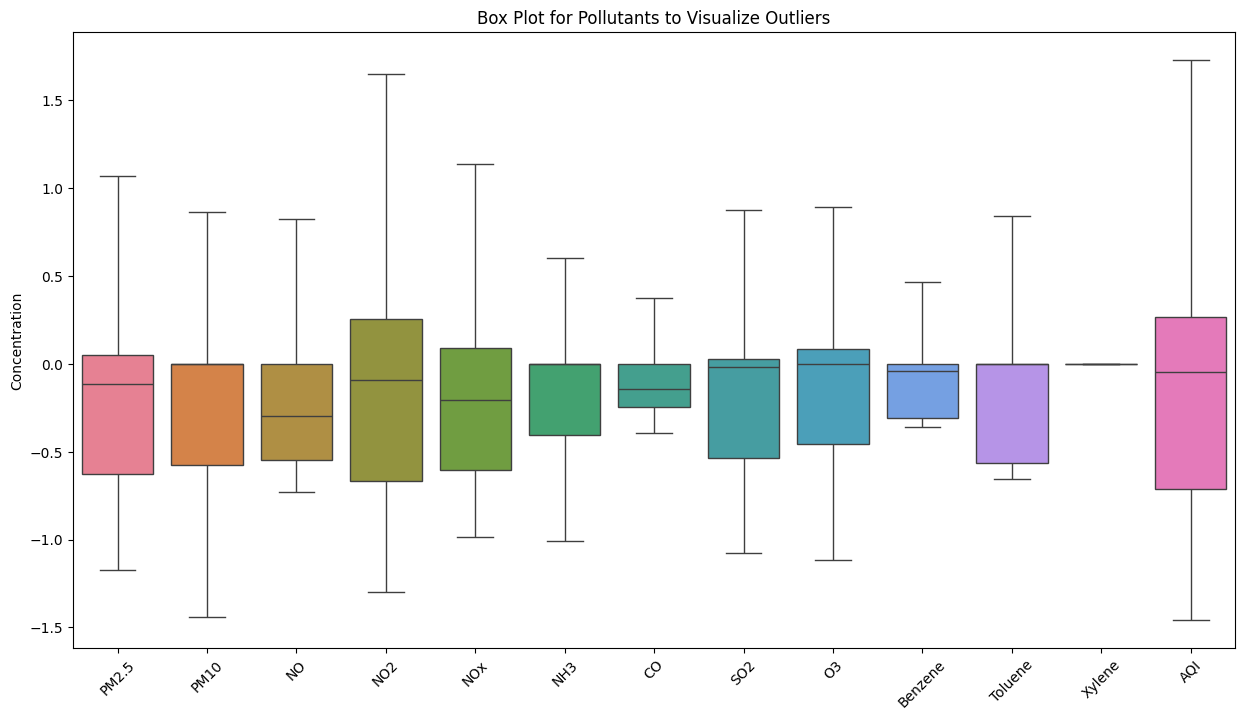

In [21]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
              'Benzene', 'Toluene', 'Xylene', 'AQI']
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[pollutants])
plt.title('Box Plot for Pollutants to Visualize Outliers')
plt.xticks(rotation=45)
plt.ylabel('Concentration')
plt.show()


 Data model building

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
            'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
X = data[features]
y = data['AQI']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.15
R² Score: 0.79
